<a href="https://colab.research.google.com/github/DanyR2001/Progetto-FIA/blob/main/Documentazione/DocHistory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduzione

Di seguito verrà riportato il processo di studio, analisi dei dati per il progetto RegressorComparato. Il progetto prevedere 2 modalità di utilizzo:
- **Auto**: Il programma prova in mainera automatica proverà ad effetuare le fasi di feature selection, scaling, ecc. I risultati non potranno essere eccelsi, ma per chi non è avvezzo ai dati potrebbe essere una soluzione.
- **Manual**: Passeremo noi al programma i le feature sulle quali vengono effettuate tutte le fasi di del modello CRISP-DM.

Qui verrano riporatate tutte le fasi di data understanding per la modalità Manual.


**Obiettivo**: Dato un dataset di dipendenti statali, provare a stimare i "Benefits" dello stipendio; ovvero i sussidi aggiuntivi allo stipendio.

**N.B**: Il seguente blocco note serve per illustrare e motiavare nello specifico le scelte che sono state prese sui dati del progetto, il reale progetto, con il suo codice e i suoi moduli, è disponibile su GitHub al seguente [link](https://github.com/DanyR2001/Progetto-FIA/tree/main).

#Normalizzazione del Dataset

Come prima cosa, dobbiamo poter rendere i dati fruibili per i regressori, ovvero in formato numerico. Dobbiamo capire quale metodologia ci convega adottare, trovando un trad-off tra memoria e efficacia.


---


Inzialmente ho prodotto un file che sostituisce autamaticamente i campi stringa di un dataset con un numero, producedo un nuovo dataset e un file .txt dove riporatare le modifiche.


---


Il quesito che dobbiamo porci è il seguente, la oneHotEncoder migliorerà l'accuratezza del nostro regressore? Ricordiamo che questa codifica è estremamente costosa computazionalemte parlando. Verifichiamo:

Iniziamo ad importare il dataset e a capire il formato dei suoi campi.

In [4]:
import pandas as pd
dataframe=pd.read_csv("./Dataset/san-francisco-payroll_2011-2019.csv")
print (dataframe)
print (dataframe.info())

<ipython-input-4-f6a710629a9a>:2: DtypeWarning: Columns (2,3,4,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe=pd.read_csv("./Dataset/san-francisco-payroll_2011-2019.csv")


           Employee Name                                       Job Title  \
0       Janet Lee Miller                         Court Staff Attorney II   
1               Gary Mar                  Electrical Transit System Mech   
2       Checil A Salvosa                       Licensed Vocational Nurse   
3       Kristian C Smock                    Stationary Eng, Sewage Plant   
4            Yun Y Chang                             Pharmacy Technician   
...                  ...                                             ...   
357402      HOWARD CHUCK                                       CUSTODIAN   
357403    BING KEUNG MAK                                       CUSTODIAN   
357404      QIN MING ZHU                                       CUSTODIAN   
357405       JOSE ALONZO                                       CUSTODIAN   
357406    NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   

         Base Pay Overtime Pay  Other Pay      Benefits  Total Pay  \
0             0.0

Come prima cosa notiamo che abbiamo il nome del dipendete nella colonna "Employee Name", informazione univoca della quale noi non abbiamo bisogno, quindi la eliminiamo.

In [5]:
dataframe=dataframe.drop(columns=["Employee Name"])

Notiamo la presenza di Nan e di "Not provided", vista la grande quantità di tuple possiamo anche pensare di eliminare le righe che non ci danno informazioni. Notiamo che i Nan rappresentano una piccola perdita di informazioni visto che li troviamo solo nella feature "Status", a differenza dei "Not Provided".

In [6]:
print("Number of istance Nan in tutto il dataset:" + str(dataframe.isna().sum().sum()))
print("Number of istance Nan nella colonna 'Status' :" + str(dataframe["Status"].isna().sum()))

Number of istance Nan in tutto il dataset:151501
Number of istance Nan nella colonna 'Status' :151501


Possiamo sostituirlo con "Non Presente".

In [7]:
import numpy as np
dataframe=dataframe.replace(np.nan,"Not Present",regex=True)
print("Number of istance Nan in tutto il dataset:" + str(dataframe.isna().sum().sum()))
print("Number of istance Nan nella colonna 'Status' :" + str(dataframe["Status"].isna().sum()))

Number of istance Nan in tutto il dataset:0
Number of istance Nan nella colonna 'Status' :0


Ora dobbiamo capire l'entità dei "Not Provided".

In [8]:
print ("Number of row: "+str(len(dataframe.index)))
print ("Number on 'Not Provided': "+str(dataframe[dataframe == 'Not Provided'].count()))

Number of row: 357407
Number on 'Not Provided': Job Title                  11
Base Pay                  606
Overtime Pay                1
Other Pay                   1
Benefits                36160
Total Pay                   0
Total Pay & Benefits        0
Year                        0
Status                      0
dtype: int64


Vista la piccola quantita di righe possiamo eliminarle.

In [9]:
print ("Number of row before cleaning: "+str(len(dataframe.index)))
dataframe=dataframe.replace("Not Provided",np.nan,regex=True)
print("Number of istance Nan in tutto il dataset before cleaning:" + str(dataframe.isna().sum().sum()))
dataframe=dataframe.dropna()
print("Number of istance Nan in tutto il dataset after cleaning:" + str(dataframe.isna().sum().sum()))
print ("Number of row after cleaning: "+str(len(dataframe.index)))

Number of row before cleaning: 357407
Number of istance Nan in tutto il dataset before cleaning:36779
Number of istance Nan in tutto il dataset after cleaning:0
Number of row after cleaning: 320631


Aggiorniamo il tipo delle colonne modificate

In [10]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320631 entries, 0 to 321247
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Job Title             320631 non-null  object 
 1   Base Pay              320631 non-null  object 
 2   Overtime Pay          320631 non-null  object 
 3   Other Pay             320631 non-null  object 
 4   Benefits              320631 non-null  object 
 5   Total Pay             320631 non-null  float64
 6   Total Pay & Benefits  320631 non-null  float64
 7   Year                  320631 non-null  int64  
 8   Status                320631 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 24.5+ MB
None


In [11]:
dataframe['Job Title']=dataframe['Job Title'].astype(str)
dataframe['Base Pay']=dataframe['Base Pay'].astype(np.float64)
dataframe['Overtime Pay']=dataframe['Overtime Pay'].astype(np.float64)
dataframe['Other Pay']=dataframe['Other Pay'].astype(np.float64)
dataframe['Benefits']=dataframe['Benefits'].astype(np.float64)
dataframe['Status']=dataframe['Status'].astype(str)
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320631 entries, 0 to 321247
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Job Title             320631 non-null  object 
 1   Base Pay              320631 non-null  float64
 2   Overtime Pay          320631 non-null  float64
 3   Other Pay             320631 non-null  float64
 4   Benefits              320631 non-null  float64
 5   Total Pay             320631 non-null  float64
 6   Total Pay & Benefits  320631 non-null  float64
 7   Year                  320631 non-null  int64  
 8   Status                320631 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 24.5+ MB
None


Arriviamo ora alla principale domanda, conviene utilizzare la oneHotEncoder su un classico personal computer? Verifichiamo quanto occupa attualemte il dataframe

In [12]:
print ("Usage memory in MB:")
print((dataframe.memory_usage(deep=True).sum())/(1024**2))
memory_old=(dataframe.memory_usage(deep=True).sum())/(1024**2)

Usage memory in MB:
61.76742744445801


Ora applichiamo la OneHotEncoder sulle 2 colonne non numeriche che abbiamo. Prima capiamo quanti e quali valori abbiamo:

In [13]:
print("Numero di valori 'Job Title':")
print(dataframe['Job Title'].nunique())
print("Valori:")
print(dataframe['Job Title'].unique())

print("Numero di valori 'Status':")
print(dataframe['Status'].nunique())
print("Valori:")
print(dataframe['Status'].unique())


Numero di valori 'Job Title':
1256
Valori:
['Court Staff Attorney II' 'Electrical Transit System Mech'
 'Licensed Vocational Nurse' ... 'IS Technical-Journey'
 'Legislative Calendar Clerk' 'Police Services Aide']
Numero di valori 'Status':
3
Valori:
['PT' 'FT' 'Not Present']


Applichiamo la codifica

In [14]:
df_enc_oneHot = pd.get_dummies(dataframe, columns=['Job Title', 'Status'])
print(df_enc_oneHot)
print(df_enc_oneHot.info())

         Base Pay  Overtime Pay  Other Pay  Benefits  Total Pay  \
0            0.00          0.00       0.00      0.00       0.00   
1        97354.53       6996.50    2380.00  38855.90  106731.03   
2        86118.00      17212.96    7272.08  34942.38  110603.04   
3       106816.03          0.00       0.00  38729.65  106816.03   
4        94039.13      14947.99    1241.69  35330.26  110228.81   
...           ...           ...        ...       ...        ...   
321243   51250.04          0.00     624.00  27041.97   51874.04   
321244   50154.51        112.37     400.00  28254.79   50666.88   
321245   51250.00          0.00     624.00  26995.16   51874.00   
321246   51485.11          0.00     810.00  26636.58   52295.11   
321247   61346.43          0.00       0.00  17590.09   61346.43   

        Total Pay & Benefits  Year  Job Title_ACPO,JuvP, Juv Prob (SFERS)  \
0                       0.00  2019                                      0   
1                  145586.93  2019       

Vediamo l'occupazione di memoria:

In [15]:
print ("Usage memory in MB:")
print((df_enc_oneHot.memory_usage(deep=True).sum())/(1024**2))
memory_new=(df_enc_oneHot.memory_usage(deep=True).sum())/(1024**2)

Usage memory in MB:
404.54369831085205


Vediamo la differenza in temini percentuali:

In [16]:
percentuale_incremento = ((memory_new - memory_old) / memory_old) * 100
print(str(percentuale_incremento)+"%")

554.9466523834467%


Creaiamo anche un dataset con codifica lable->numero.

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df_enc_simp=dataframe
df_enc_simp['Job Title']= label_encoder.fit_transform(df_enc_simp['Job Title'])
df_enc_simp['Job Title']=df_enc_simp['Job Title'].astype(np.int64)
df_enc_simp['Status']= label_encoder.fit_transform(df_enc_simp['Status'])


#Analisi del dataset

Come prima cosa cerchiamo di capire come i dati siano tra loro correlati, in quanto se abbiamo una dipendeza lineare tra le feature, abbiamo maggiori possibilità di successo per i regressori di tipo lienare. Per fare cio utiliezzeremo la matrice di correlazione.

Ovviamente prima andremo ad eliminare le feature che non ci servono, ovvere "Total Pay" e "Total Pay & Benefits", in quanto questi sono la somma di altre variabili e sarebbero: ridondanti nel primo caso e forviante nel secondo.

In [18]:
df_enc_simp=df_enc_simp.drop(columns=["Total Pay","Total Pay & Benefits"])
df_enc_oneHot=df_enc_oneHot.drop(columns=["Total Pay","Total Pay & Benefits"])

Ora possiamo procedere con la verifica

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320631 entries, 0 to 321247
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Job Title     320631 non-null  int64  
 1   Base Pay      320631 non-null  float64
 2   Overtime Pay  320631 non-null  float64
 3   Other Pay     320631 non-null  float64
 4   Benefits      320631 non-null  float64
 5   Year          320631 non-null  int64  
 6   Status        320631 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 19.6 MB
None


<Axes: >

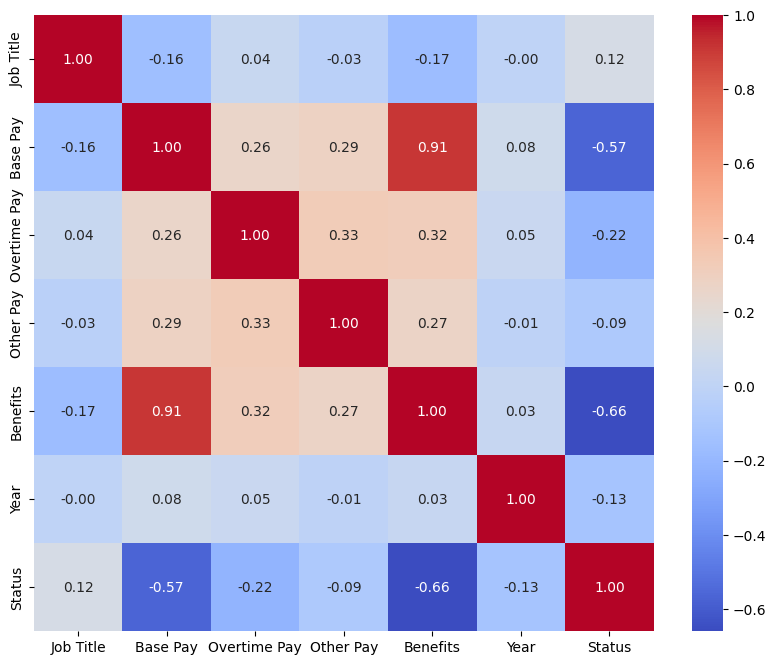

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df_enc_simp.info())
correlazione = df_enc_simp.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlazione, annot=True, cmap='coolwarm', fmt=".2f")

Come possiamo notare le variabili con correlazione positiva con la nostra variabile target -ovvero "Benefits"- sono:
- BasePay
- OverTime Pay
- Other Pay

Visto e considerato questo, andremo a fare una pulizia di queste feature eliminando tutte quelle che sono uguali a zero.

In [20]:
print ("Number of row before cleaning: "+str(len(df_enc_simp.index)))
df_enc_simp.drop(df_enc_simp[df_enc_simp['Base Pay'] == 0].index, inplace=True)
df_enc_simp.drop(df_enc_simp[df_enc_simp['Benefits'] == 0].index, inplace=True)
print ("Number of row after cleaning: "+str(len(df_enc_simp.index)))
df_enc_oneHot.drop(df_enc_oneHot[df_enc_oneHot['Base Pay'] == 0].index, inplace=True)
df_enc_oneHot.drop(df_enc_oneHot[df_enc_oneHot['Benefits'] == 0].index, inplace=True)

Number of row before cleaning: 320631
Number of row after cleaning: 313522


Ricordiamo l'obbiettivo di questo blocco note non è sviluppare il progetto ma capire se implementare o meno alcune funzionalità e giustificare le scelte prese nel progetto, le quali altrimenti potrebbero risultare aleatorie.
Per verificare o meno l'efficacia delle oneHotEncoder la utlizzeremo con un singolo Regressore.

In [21]:
from sklearn import linear_model

Agente=linear_model.LinearRegression(n_jobs=-1)


Dividiamo il dataset in test e train:

In [22]:
import random
from sklearn.model_selection import train_test_split


var_dip = df_enc_simp['Benefits']
var_ind = df_enc_simp.drop(columns=['Benefits'])

indi_training_set,indi_testing_set,dip_training_set,dip_test_set = train_test_split(var_ind, var_dip,test_size=0.33,random_state=random.randint(0, 256), shuffle=True)


Addestriamo e testiamo:

In [23]:
from sklearn.model_selection import cross_validate, RepeatedKFold
import statistics


rfk = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random.randint(0, 256))
tests = list(["neg_mean_absolute_error", "neg_mean_squared_error","neg_root_mean_squared_error", "r2"])
cv_score = cross_validate(Agente, indi_training_set, dip_training_set, cv=rfk, n_jobs=1, verbose=5, scoring=tests)
fit_time_mean = statistics.mean(cv_score['fit_time'])
score_time_mean = statistics.mean(cv_score['score_time'])
mean_absolute = statistics.mean(cv_score['test_neg_mean_absolute_error'])
mean_squared = statistics.mean(cv_score['test_neg_mean_squared_error'])
root_mean_absolute = statistics.mean(cv_score['test_neg_root_mean_squared_error'])
r2 = statistics.mean(cv_score['test_r2'])

print("Fit time:"+str(fit_time_mean)+"Score time:"+str(score_time_mean)+" MAE: "+str(mean_absolute)+" MSE: "+str(mean_squared)+" RMSE: "+str(root_mean_absolute)+" r2: "+str(r2))

[CV] END  neg_mean_absolute_error: (test=-3928.520) neg_mean_squared_error: (test=-30307739.227) neg_root_mean_squared_error: (test=-5505.247) r2: (test=0.869) total time=   0.1s
[CV] END  neg_mean_absolute_error: (test=-3926.592) neg_mean_squared_error: (test=-29905364.174) neg_root_mean_squared_error: (test=-5468.580) r2: (test=0.869) total time=   0.1s
[CV] END  neg_mean_absolute_error: (test=-3934.706) neg_mean_squared_error: (test=-30235604.911) neg_root_mean_squared_error: (test=-5498.691) r2: (test=0.868) total time=   0.1s
[CV] END  neg_mean_absolute_error: (test=-3921.191) neg_mean_squared_error: (test=-29986195.787) neg_root_mean_squared_error: (test=-5475.965) r2: (test=0.870) total time=   0.1s
Fit time:0.07987344264984131Score time:0.018843770027160645 MAE: -3927.752048761883 MSE: -30108726.024624106 RMSE: -5487.1206808661655 r2: 0.8691083356744873


Proviamo con l'altro dataset

In [25]:
var_dip = df_enc_oneHot['Benefits']
var_ind = df_enc_oneHot.drop(columns=['Benefits'])

indi_training_set,indi_testing_set,dip_training_set,dip_test_set = train_test_split(var_ind, var_dip,test_size=0.33,random_state=random.randint(0, 256), shuffle=True)

rfk = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random.randint(0, 256))
tests = list(["neg_mean_absolute_error", "neg_mean_squared_error","neg_root_mean_squared_error", "r2"])
cv_score = cross_validate(Agente, indi_training_set, dip_training_set, cv=rfk, n_jobs=1, verbose=5, scoring=tests)
fit_time_mean = statistics.mean(cv_score['fit_time'])
score_time_mean = statistics.mean(cv_score['score_time'])
mean_absolute = statistics.mean(cv_score['test_neg_mean_absolute_error'])
mean_squared = statistics.mean(cv_score['test_neg_mean_squared_error'])
root_mean_absolute = statistics.mean(cv_score['test_neg_root_mean_squared_error'])
r2 = statistics.mean(cv_score['test_r2'])

print("Fit time:"+str(fit_time_mean)+" Score time:"+str(score_time_mean)+" MAE: "+str(mean_absolute)+" MSE: "+str(mean_squared)+" RMSE: "+str(root_mean_absolute)+" r2: "+str(r2))


[CV] END  neg_mean_absolute_error: (test=-15285630.180) neg_mean_squared_error: (test=-1285202616705213952.000) neg_root_mean_squared_error: (test=-1133667771.750) r2: (test=-5605696917.833) total time=  35.5s
[CV] END  neg_mean_absolute_error: (test=-2919.582) neg_mean_squared_error: (test=-19322448.485) neg_root_mean_squared_error: (test=-4395.731) r2: (test=0.916) total time=  35.8s
[CV] END  neg_mean_absolute_error: (test=-2907.344) neg_mean_squared_error: (test=-19150204.494) neg_root_mean_squared_error: (test=-4376.095) r2: (test=0.917) total time=  34.8s
[CV] END  neg_mean_absolute_error: (test=-2913.942) neg_mean_squared_error: (test=-19168725.813) neg_root_mean_squared_error: (test=-4378.210) r2: (test=0.917) total time=  34.0s
Fit time:34.52074009180069Score time:0.5147888660430908 MAE: -3823592.7617935166 MSE: -3.2130065419071386e+17 RMSE: -283420230.44649583 r2: -1401424228.7710292


Come possiamo notare r2 è peggiore con la oneHotEncoder, anche il tempo di fit e score sono notevolmente più alti. Di coseguenza non è stata implementata nel progetto.

#Il progetto

Il resto del progetto provvederà a provare diverse normalizzazioni sui dati, oltre a fornire una pulizia degli outlier e comparere i risultati di oltre 17 regressori diversi. Tutto facilemnte consultabile attraverso una GUI.